In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [3]:
file = '..//data//nsduh_selected.csv'
main_data = pd.read_csv(file, sep=',')

In [4]:
x = main_data.drop('RISKGR',axis=1)
y = main_data['RISKGR']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=121)

In [6]:
from sklearn.svm import SVC

In [16]:
param_grid = {"gamma": ["auto", 0.01, 0.1, 0.5, 1, 2, 10],
              "C": [0.001, 0.01, 0.1, 1, 10],
             }

In [18]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(n_splits=5))

In [19]:
gs_result = gs.fit(x_train, y_train)

In [20]:
print(gs_result.best_score_)
print(gs_result.best_estimator_)
print(gs_result.best_params_)

0.7620135557078669
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1, 'gamma': 0.01}


In [7]:
svc_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr',
                degree=3, gamma=0.01, kernel='rbf', max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)

In [8]:
predictions = cross_val_predict(svc_model, x,y, cv=StratifiedKFold(n_splits=10))
score = cross_val_score(svc_model, x, y, scoring='accuracy', cv = StratifiedKFold(n_splits=10))
svc_accuracy = score.mean() * 100

In [9]:
svc_accuracy

76.84452038199528

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print("SVC accuracy: {}".format(svc_accuracy))
print(classification_report(y,predictions))
print(confusion_matrix(y, predictions))

SVC accuracy: 76.84452038199528
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     22301
           1       0.68      0.70      0.69     19467
           2       0.61      0.59      0.60     14508

   micro avg       0.77      0.77      0.77     56276
   macro avg       0.75      0.74      0.75     56276
weighted avg       0.77      0.77      0.77     56276

[[21074   637   590]
 [  963 13678  4826]
 [  134  5881  8493]]


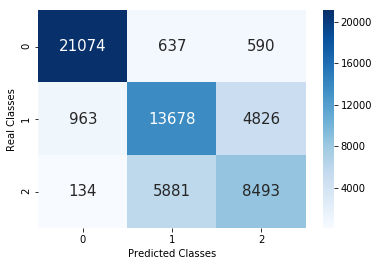

In [12]:
sns.heatmap(confusion_matrix(y, predictions), annot=True, cmap="Blues",fmt='g', annot_kws={"size": 15})
plt.xlabel('Predicted Classes')
plt.ylabel('Real Classes')
plt.savefig('..//images//confusion_svn.jpg', dpi = 300)